In [90]:
import sys
print(sys.path)

['/home/ubuntu/environment/deep-learning-with-python-notebooks', '/home/ubuntu/anaconda3/lib/python37.zip', '/home/ubuntu/anaconda3/lib/python3.7', '/home/ubuntu/anaconda3/lib/python3.7/lib-dynload', '', '/home/ubuntu/anaconda3/lib/python3.7/site-packages', '/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/ubuntu/.ipython']


In [91]:
import keras
keras.__version__

'2.3.1'

In [92]:
import tensorflow
tensorflow.__version__

'2.1.0'

# Data representations for neural networks

A tensor is defined by three key attributes:

**Number of axes (rank)** — For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy. 

**Shape** — This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().

**Data type** (usually called dtype in Python libraries) — This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. 

On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation. 

To make this more concrete, let’s look back at the data we processed in the MNIST example. 
First, we load the MNIST dataset:

In [93]:
from keras.datasets import mnist

In [94]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [95]:
print(train_images.ndim)

3


In [96]:
print(train_images.shape)

(60000, 28, 28)


In [97]:
print(train_images.dtype)

uint8


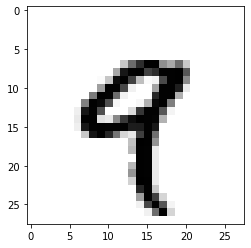

In [98]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Manipulating tensors in Numpy
In the previous example, we selected a specific digit alongside the first axis using the syntax train_images[i]. Selecting specific elements in a tensor is called **tensor slicing**. Let’s look at the tensor-slicing operations you can do on Numpy arrays.

The following example selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):

In [99]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. **Note that : is equivalent to selecting the entire axis**:

In [100]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

Or:

In [101]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

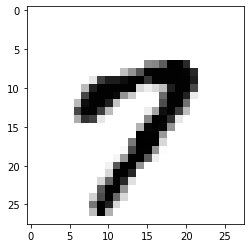

In [102]:
plt.imshow(my_slice[5], cmap=plt.cm.binary)
plt.show()

In general, you may select between any two indices along each tensor axis. 

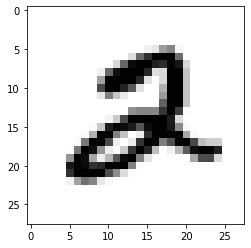

In [103]:
plt.imshow(train_images[5], cmap=plt.cm.binary)
plt.show()

For instance, select 14 × 14 pixels in the bottom-right corner of all images, you do this:

In [104]:
my_slice_bottom_right = train_images[:, 14:, 14:]

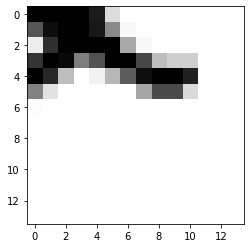

In [105]:
plt.imshow(my_slice_bottom_right[5], cmap=plt.cm.binary)
plt.show()

This time we select 14 × 14 pixels in the up-left corner of all images, you do this:

In [106]:
my_slice_up_left = train_images[:, 0:14, 0:14]

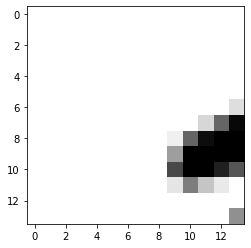

In [107]:
plt.imshow(my_slice_up_left[5], cmap=plt.cm.binary)
plt.show()

This time we select 14 × 14 pixels in the up-right corner of all images, you do this:

In [108]:
my_slice_up_right = train_images[:, 0:14, 14:]

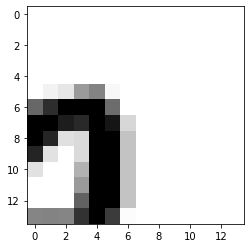

In [109]:
plt.imshow(my_slice_up_right[5], cmap=plt.cm.binary)
plt.show()

This time we select 14 × 14 pixels in the bottom-left corner of all images, you do this:

In [110]:
my_slice_bottom_left = train_images[:, 14:, 0:14]

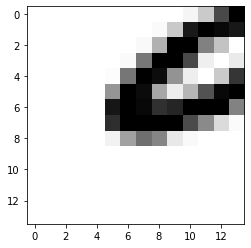

In [111]:
plt.imshow(my_slice_bottom_left[5], cmap=plt.cm.binary)
plt.show()

It’s also possible to use negative indices. Much like negative indices in Python lists, they indicate a position relative to the end of the current axis. In order to crop the images to patches of 14 × 14 pixels centered in the middle, you do this:

In [112]:
my_slice_center_part = train_images[:, 7:-7, 7:-7]

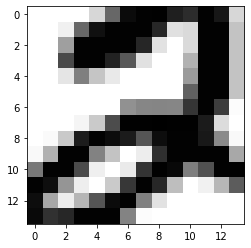

In [114]:
plt.imshow(my_slice_center_part[5], cmap=plt.cm.binary)
plt.show()

## Real-world examples of data tensors
Let’s make data tensors more concrete with a few examples similar to what you’ll encounter later. The data you’ll manipulate will almost always fall into one of the following categories:

**Vector data:** 2D tensors of shape(samples,features)

**Timeseries data or sequence data:** 3D tensors of shape (samples, timesteps, features)

**Images:** 4D tensors of shape(samples, height, width, channels) or (samples, channels, height, width)

**Video:** 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)


### Vector data
**An actuarial dataset of people:** Where we consider each person’s age, ZIP code, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a 2D tensor of shape (100000, 3).

**A dataset of text documents:** Where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).

### Timeseries data or sequence data

Figure 2.3. A 3D timeseries data tensor.png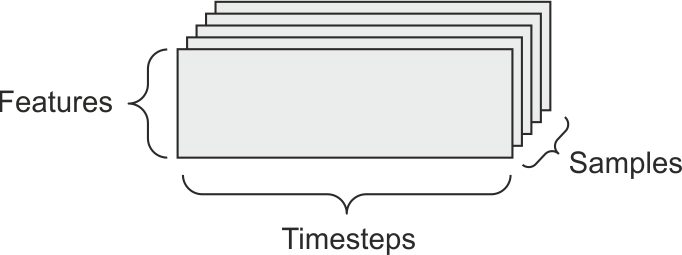

The time axis is always **the second axis (axis of index 1)**, by convention (samples, timesteps, features). Let’s look at a few examples:

**A dataset of stock prices.** Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250, 390,3). Here, each sample would be one day’s worth of data.

**A dataset of tweets**, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 **(an all-zeros vector except for a 1 entry at the index corresponding to the character)**. Then each tweet can be encoded as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

### Image data
Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a one-dimensional color channel for grayscale images. 

A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3).

Figure 2.4. A 4D image data tensor (channels-first convention).jpg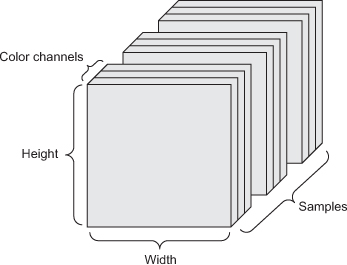

There are two conventions for shapes of images tensors: **the channels-last convention (used by TensorFlow)** and **the channels-first convention (used by Theano)**. 

The **TensorFlow** machine-learning framework, from Google, places the color-depth axis at the end: **(samples, height, width, color_depth)**. Meanwhile, Theano places the color depth axis right after the batch axis: (samples, color_depth, height, width). With the Theano convention, the previous examples would become (128, 1, 256, 256) and (128, 3, 256, 256). The Keras framework provides support for both formats. 

### Video data
Video data is one of the few types of real-world data for which you’ll need **5D tensors**. 

A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a 3D tensor (height, width, color_depth), a sequence of frames can be stored in a 4D tensor (frames, height, width, color_ depth), and thus a batch of different videos can be stored in a 5D tensor of shape (samples, frames, height, width, color_depth).

For instance, a **60-second, 144 × 256 YouTube video clip** sampled at **4 frames per second** would have **240 frames**. 

A batch of **four such video clips** would be stored in a tensor of shape **(4, 240, 144, 256, 3)**. That’s a total of 106,168,320 values! If the dtype of the tensor was float32, then each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! 

(The caculation logic is: 1MB=1024KB, 1Byte=8bits, so:
 106,168,320 * 32bits/8bits = 424,673,280 Bytes = 414MB )

Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).